In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image

In [118]:
# Load data
pixel_values_df = pd.read_csv('LightHouse-labeledPixelValues.csv') # Input: rgb values
pixel_cluster_ids_df = pd.read_csv('Lighthouse-labeledPixelClusterIDs.csv') # Target: cluster ids

# Load image
image = Image.open("Lighthouse-Image.png")
image_data = np.array(image)
pixels = image_data.reshape(-1, 3)
normalized_pixels = pixels / 255.0

In [119]:
# Get the training data
x_train = pixel_values_df.values
y_train = pixel_cluster_ids_df.values.ravel()

In [120]:
# Train model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [121]:
# Predicts the cluster of each pixel
predicted_clusters = knn.predict(normalized_pixels)

print(f"Unique predicted clusters: {np.unique(predicted_clusters)}")

Unique predicted clusters: [ 1  2  3  4  5  6  7  8  9 10]


In [122]:
# Calculate the median color of each cluster
unique_clusters = np.unique(y_train)
cluster_colors = {}

# Iterate through each of the clusters
for cluster in unique_clusters:
    cluster_pixels = x_train[y_train == cluster]  # Get pixels belonging to the cluster
    median_color = np.median(cluster_pixels, axis=0)  # Calculate the median color
    median_color = np.clip(median_color * 255, 0, 255)  # Ensure values are between [0, 255]
    cluster_colors[cluster] = median_color.astype(np.uint8) # Save the cluster color

# Map each pixel in the new image to the corresponding cluster color
pop_art_pixels = np.array([cluster_colors[cluster] for cluster in predicted_clusters])

In [123]:
# Reshape the pop_art_pixels to the shape of the original image
pop_art_image = pop_art_pixels.reshape(image_data.shape).astype(np.uint8)


In [124]:
# Reconstruction of the image
pop_art_image_pil = Image.fromarray(pop_art_image)
pop_art_image_pil.show()  # Display the Pop Art image
pop_art_image_pil.save('pop_art_image_final.png')

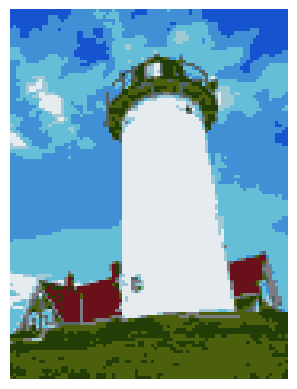

/usr/bin/xdg-open: 882: x-www-browser: not found
/usr/bin/xdg-open: 882: firefox: not found
/usr/bin/xdg-open: 882: iceweasel: not found
/usr/bin/xdg-open: 882: seamonkey: not found
/usr/bin/xdg-open: 882: mozilla: not found
/usr/bin/xdg-open: 882: epiphany: not found
/usr/bin/xdg-open: 882: konqueror: not found
/usr/bin/xdg-open: 882: chromium: not found
/usr/bin/xdg-open: 882: chromium-browser: not found
/usr/bin/xdg-open: 882: google-chrome: not found
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmpln7e6h75.PNG'


In [125]:
# Display the Pop Art image
plt.imshow(pop_art_image)
plt.axis('off')
plt.show()